In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import PIL
import PIL.Image
import cv2
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
data_dir = "./img_class"
train_dir = os.path.join(data_dir,"seg_train/seg_train")
test_dir = os.path.join(data_dir,"seg_test/seg_test")

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
class_map = dict([(v,k) for k,v in train_data.class_indices.items()])

Found 14034 images belonging to 6 classes.


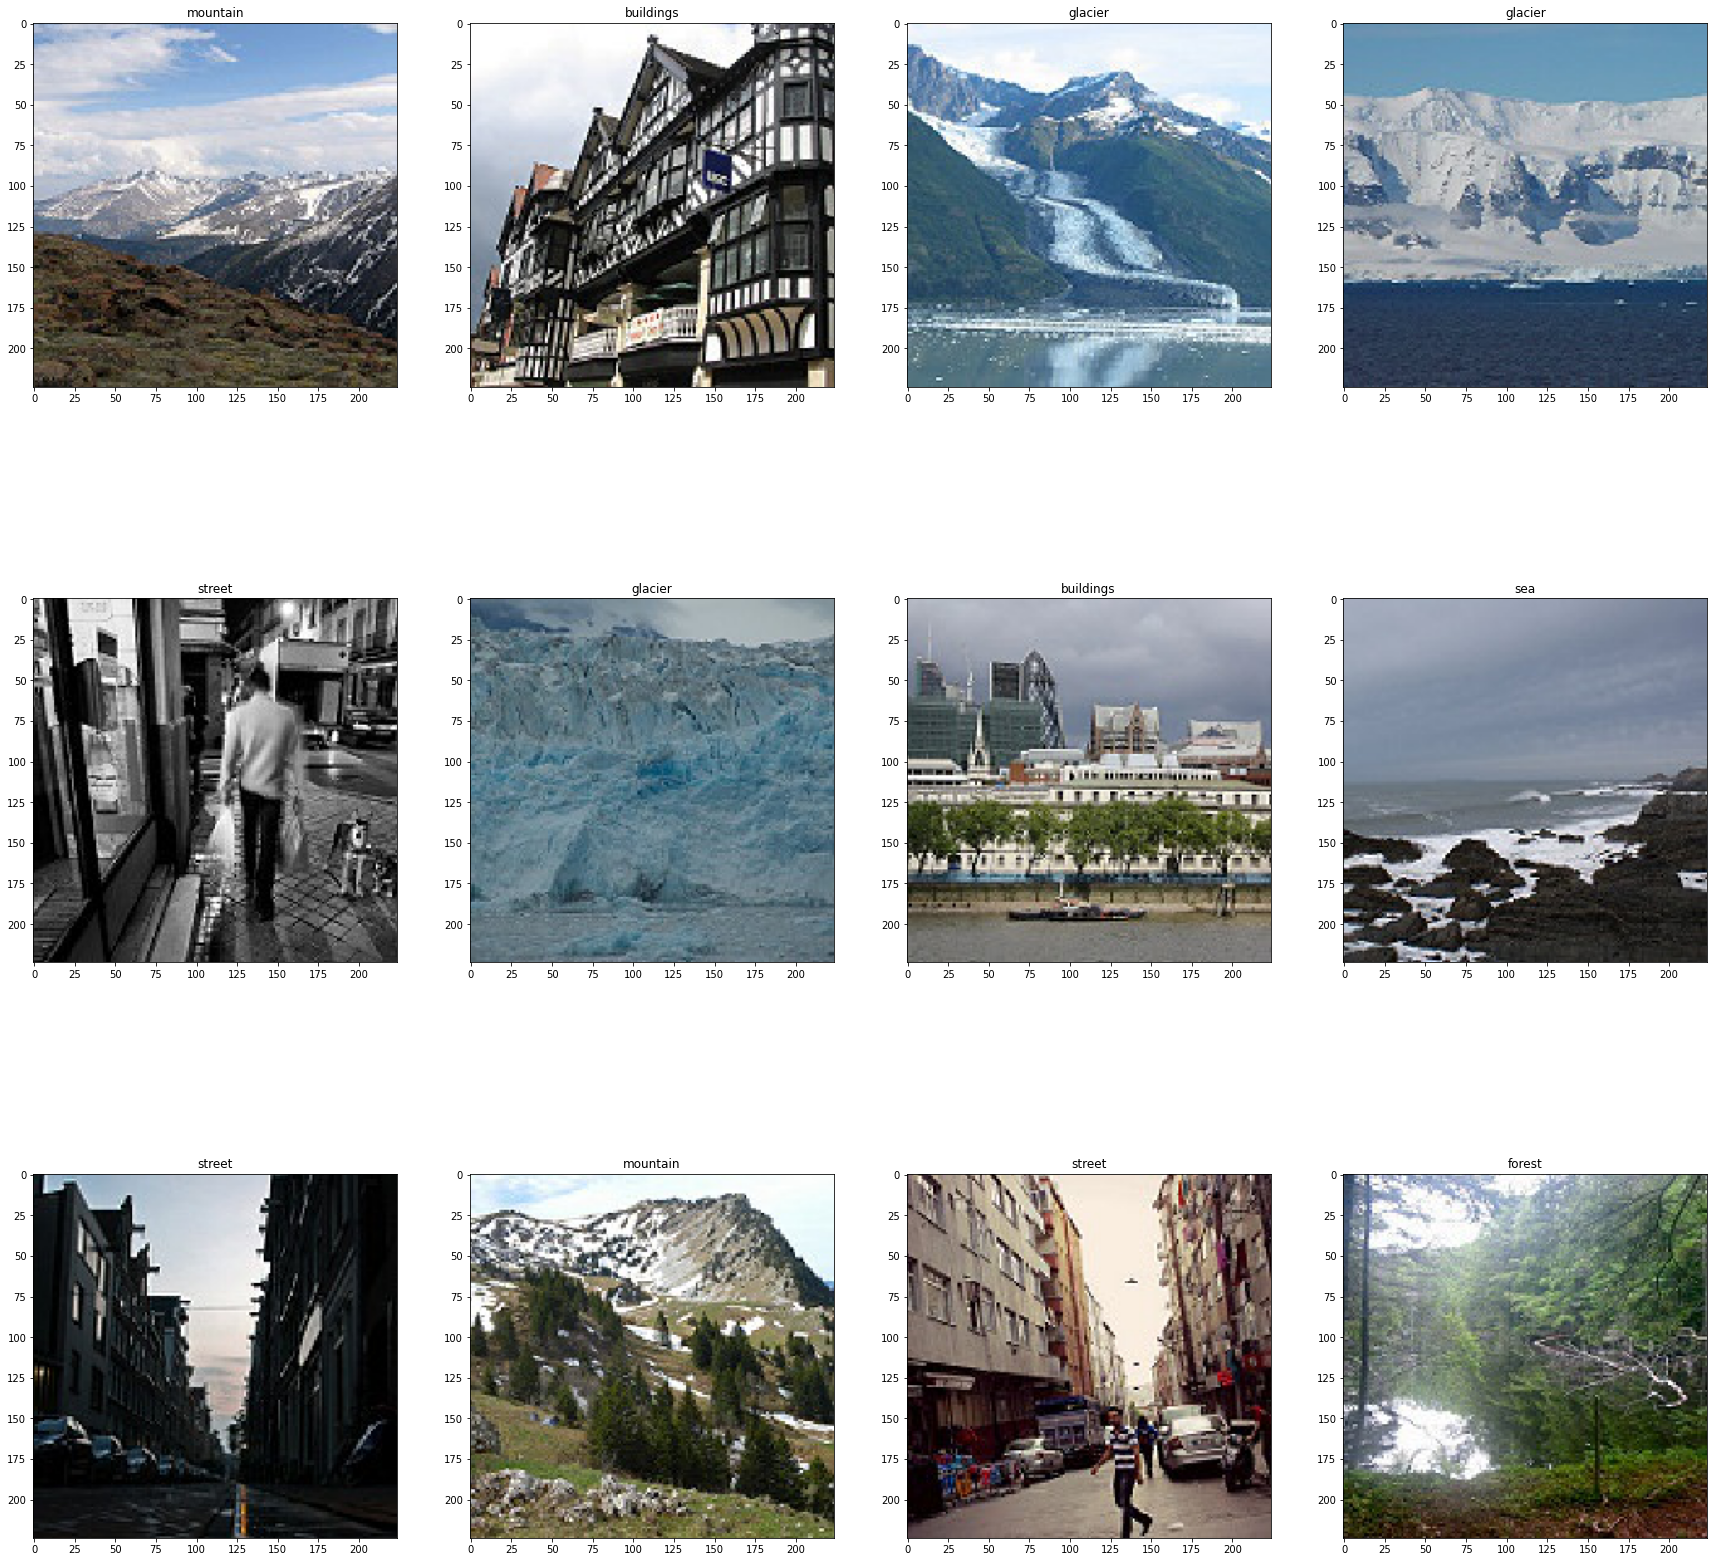

In [5]:
vis_datagen = ImageDataGenerator(rescale=1./255)
vis_data = vis_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

fig = plt.figure(figsize=(30, 30))
batch=next(vis_data)  # returns the next batch of images and labels 

for i in range(1,13):
    plt.subplot(3, 4, i)
    img=batch[0][i]
    plt.imshow(img)
    plt.title(class_map[np.argmax(batch[1][i])])

In [6]:
from squeezenet import SqueezeNet_11 

In [7]:
squeez_model = SqueezeNet_11(input_shape=(224,224,3), nb_classes=6)
squeez_model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [8]:
squeez_history = squeez_model.fit(train_data,
                            steps_per_epoch=10,
                            epochs=20,
                            validation_data=test_data,
                            validation_steps=2)

Epoch 1/20
10/10 [==============================] - 10s 962ms/step - loss: 1.7950 - accuracy: 0.1750 - val_loss: 1.7900 - val_accuracy: 0.2031
Epoch 2/20
10/10 [==============================] - 9s 861ms/step - loss: 1.7925 - accuracy: 0.1406 - val_loss: 1.7887 - val_accuracy: 0.1250
Epoch 3/20
10/10 [==============================] - 9s 863ms/step - loss: 1.7885 - accuracy: 0.1844 - val_loss: 1.7895 - val_accuracy: 0.1094
Epoch 4/20
10/10 [==============================] - 9s 869ms/step - loss: 1.7959 - accuracy: 0.1719 - val_loss: 1.7826 - val_accuracy: 0.2344
Epoch 5/20
10/10 [==============================] - 9s 872ms/step - loss: 1.7890 - accuracy: 0.1813 - val_loss: 1.8011 - val_accuracy: 0.0781
Epoch 6/20
10/10 [==============================] - 9s 873ms/step - loss: 1.7897 - accuracy: 0.1594 - val_loss: 1.7941 - val_accuracy: 0.1094
Epoch 7/20
10/10 [==============================] - 9s 868ms/step - loss: 1.7888 - accuracy: 0.2031 - val_loss: 1.7755 - val_accuracy: 0.1719
Epoch

In [20]:
iv3 = tf.keras.applications.InceptionV3(input_shape=(224,224,3),weights=None, classes=6)

In [21]:
iv3.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
iv3_history = iv3.fit(train_data,
                steps_per_epoch=10,
                epochs=20,
                validation_data=test_data,
                validation_steps=2)

Epoch 1/20
10/10 [==============================] - 54s 5s/step - loss: 2.4237 - accuracy: 0.3688 - val_loss: 1.8102 - val_accuracy: 0.2031
Epoch 2/20
10/10 [==============================] - 53s 5s/step - loss: 1.5688 - accuracy: 0.4625 - val_loss: 1.9166 - val_accuracy: 0.1406
Epoch 3/20
10/10 [==============================] - 54s 5s/step - loss: 1.4130 - accuracy: 0.4531 - val_loss: 2.2342 - val_accuracy: 0.1406
Epoch 4/20
10/10 [==============================] - 54s 5s/step - loss: 1.2799 - accuracy: 0.4688 - val_loss: 2.5709 - val_accuracy: 0.1406
Epoch 5/20
10/10 [==============================] - 54s 5s/step - loss: 1.3224 - accuracy: 0.4938 - val_loss: 2.8512 - val_accuracy: 0.1875
Epoch 6/20
10/10 [==============================] - 54s 5s/step - loss: 1.2899 - accuracy: 0.5156 - val_loss: 2.8586 - val_accuracy: 0.2344
Epoch 7/20
10/10 [==============================] - 54s 5s/step - loss: 1.2614 - accuracy: 0.5375 - val_loss: 3.3278 - val_accuracy: 0.2031
Epoch 8/20
10/10 [==

In [9]:
from model import ModifiedSqueezenet 

In [10]:
mod_squeez_model = ModifiedSqueezenet(input_shape=(224,224,3), nb_classes=6)

In [11]:
mod_squeez_model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [12]:
mod_squeez_history = mod_squeez_model.fit(train_data,
                steps_per_epoch=10,
                epochs=20,
                validation_data=test_data,
                validation_steps=2)

Epoch 1/20
10/10 [==============================] - 38s 4s/step - loss: 1.7790 - accuracy: 0.2156 - val_loss: 1.8008 - val_accuracy: 0.1094
Epoch 2/20
10/10 [==============================] - 36s 4s/step - loss: 1.7957 - accuracy: 0.1625 - val_loss: 1.7929 - val_accuracy: 0.0938
Epoch 3/20
10/10 [==============================] - 36s 4s/step - loss: 1.7934 - accuracy: 0.1656 - val_loss: 1.7901 - val_accuracy: 0.2500
Epoch 4/20
10/10 [==============================] - 36s 4s/step - loss: 1.7935 - accuracy: 0.1875 - val_loss: 1.7933 - val_accuracy: 0.1250
Epoch 5/20
10/10 [==============================] - 35s 4s/step - loss: 1.7900 - accuracy: 0.2094 - val_loss: 1.7855 - val_accuracy: 0.3281
Epoch 6/20
10/10 [==============================] - 35s 4s/step - loss: 1.7815 - accuracy: 0.2750 - val_loss: 1.7698 - val_accuracy: 0.2344
Epoch 7/20
10/10 [==============================] - 35s 4s/step - loss: 1.7258 - accuracy: 0.2438 - val_loss: 1.8178 - val_accuracy: 0.2812
Epoch 8/20
10/10 [==

In [13]:
from model import ModifiedSqueezenet_v2

In [14]:
mod_squeez_model_v2 = ModifiedSqueezenet_v2(input_shape=(224,224,3), nb_classes=6,epsilon =0.5)

In [15]:
mod_squeez_model_v2.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
mod_squeez_v2_history = mod_squeez_model_v2.fit(train_data,
                steps_per_epoch=10,
                epochs=20,
                validation_data=test_data,
                validation_steps=2)

Epoch 1/20
10/10 [==============================] - 27s 3s/step - loss: 1.7942 - accuracy: 0.1906 - val_loss: 1.7903 - val_accuracy: 0.2344
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 1.7919 - accuracy: 0.1562 - val_loss: 1.7909 - val_accuracy: 0.1719
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 1.7916 - accuracy: 0.1656 - val_loss: 1.7952 - val_accuracy: 0.1406
Epoch 4/20
10/10 [==============================] - 26s 3s/step - loss: 1.7787 - accuracy: 0.1625 - val_loss: 1.7852 - val_accuracy: 0.3125
Epoch 5/20
10/10 [==============================] - 26s 3s/step - loss: 1.7873 - accuracy: 0.2094 - val_loss: 1.7959 - val_accuracy: 0.1406
Epoch 6/20
10/10 [==============================] - 26s 3s/step - loss: 1.7944 - accuracy: 0.1531 - val_loss: 1.7899 - val_accuracy: 0.1406
Epoch 7/20
10/10 [==============================] - 26s 3s/step - loss: 1.7865 - accuracy: 0.1937 - val_loss: 1.7951 - val_accuracy: 0.1406
Epoch 8/20
10/10 [==

Text(0.5, 1.0, 'Accuracy comparision')

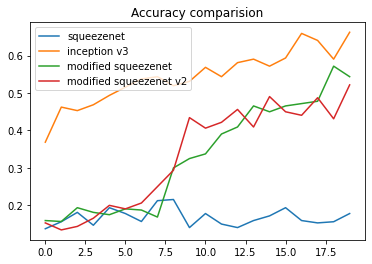

In [28]:
plt.plot(squeez_history.history['accuracy'])
plt.plot(iv3_history.history['accuracy'])
plt.plot(mod_squeez_history.history['accuracy'])
plt.plot(mod_squeez_v2_history.history['accuracy'])
plt.legend(["squeezenet","inception v3","modified squeezenet","modified squeezenet v2"])
plt.title("Accuracy comparision")

Text(0.5, 1.0, 'loss comparision')

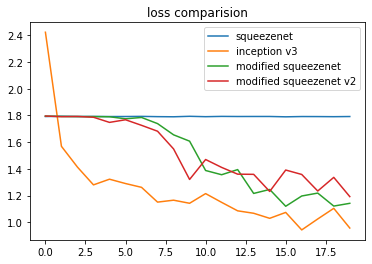

In [29]:
plt.plot(squeez_history.history['loss'])
plt.plot(iv3_history.history['loss'])
plt.plot(mod_squeez_history.history['loss'])
plt.plot(mod_squeez_v2_history.history['loss'])
plt.legend(["squeezenet","inception v3","modified squeezenet","modified squeezenet v2"])
plt.title("loss comparision")

Text(0.5, 1.0, 'Validation Accuracy comparision')

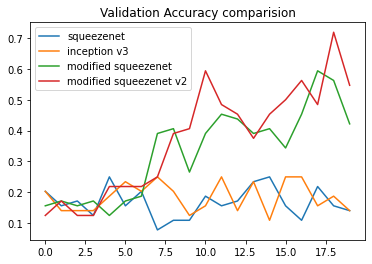

In [30]:
plt.plot(squeez_history.history['val_accuracy'])
plt.plot(iv3_history.history['val_accuracy'])
plt.plot(mod_squeez_history.history['val_accuracy'])
plt.plot(mod_squeez_v2_history.history['val_accuracy'])
plt.legend(["squeezenet","inception v3","modified squeezenet","modified squeezenet v2"])
plt.title("Validation Accuracy comparision")

Text(0.5, 1.0, 'Validation loss comparision')

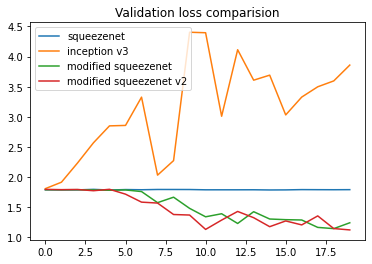

In [31]:
plt.plot(squeez_history.history['val_loss'])
plt.plot(iv3_history.history['val_loss'])
plt.plot(mod_squeez_history.history['val_loss'])
plt.plot(mod_squeez_v2_history.history['val_loss'])
plt.legend(["squeezenet","inception v3","modified squeezenet","modified squeezenet v2"])
plt.title("Validation loss comparision")

In [62]:
mod_squeez_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 96) 14208       input_2[0][0]                    
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 55, 55, 96)   0           conv1[0][0]                      
__________________________________________________________________________________________________
fire1_squeeze (Conv2D)          (None, 55, 55, 64)   6208        maxpool1[0][0]                   
_______________________________________________________________________________________

In [32]:
mod_squeez_model_v2.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 96) 14208       input_6[0][0]                    
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 55, 55, 96)   0           conv1[0][0]                      
__________________________________________________________________________________________________
fire1_squeeze (Conv2D)          (None, 55, 55, 64)   6208        maxpool1[0][0]                   
______________________________________________________________________________________

In [20]:
pred_dir = os.path.join(data_dir,"seg_pred/seg_pred")
img_files = os.listdir(pred_dir)

In [59]:
file_indx = np.random.randint(0,high =len(img_files)-1,size=12)

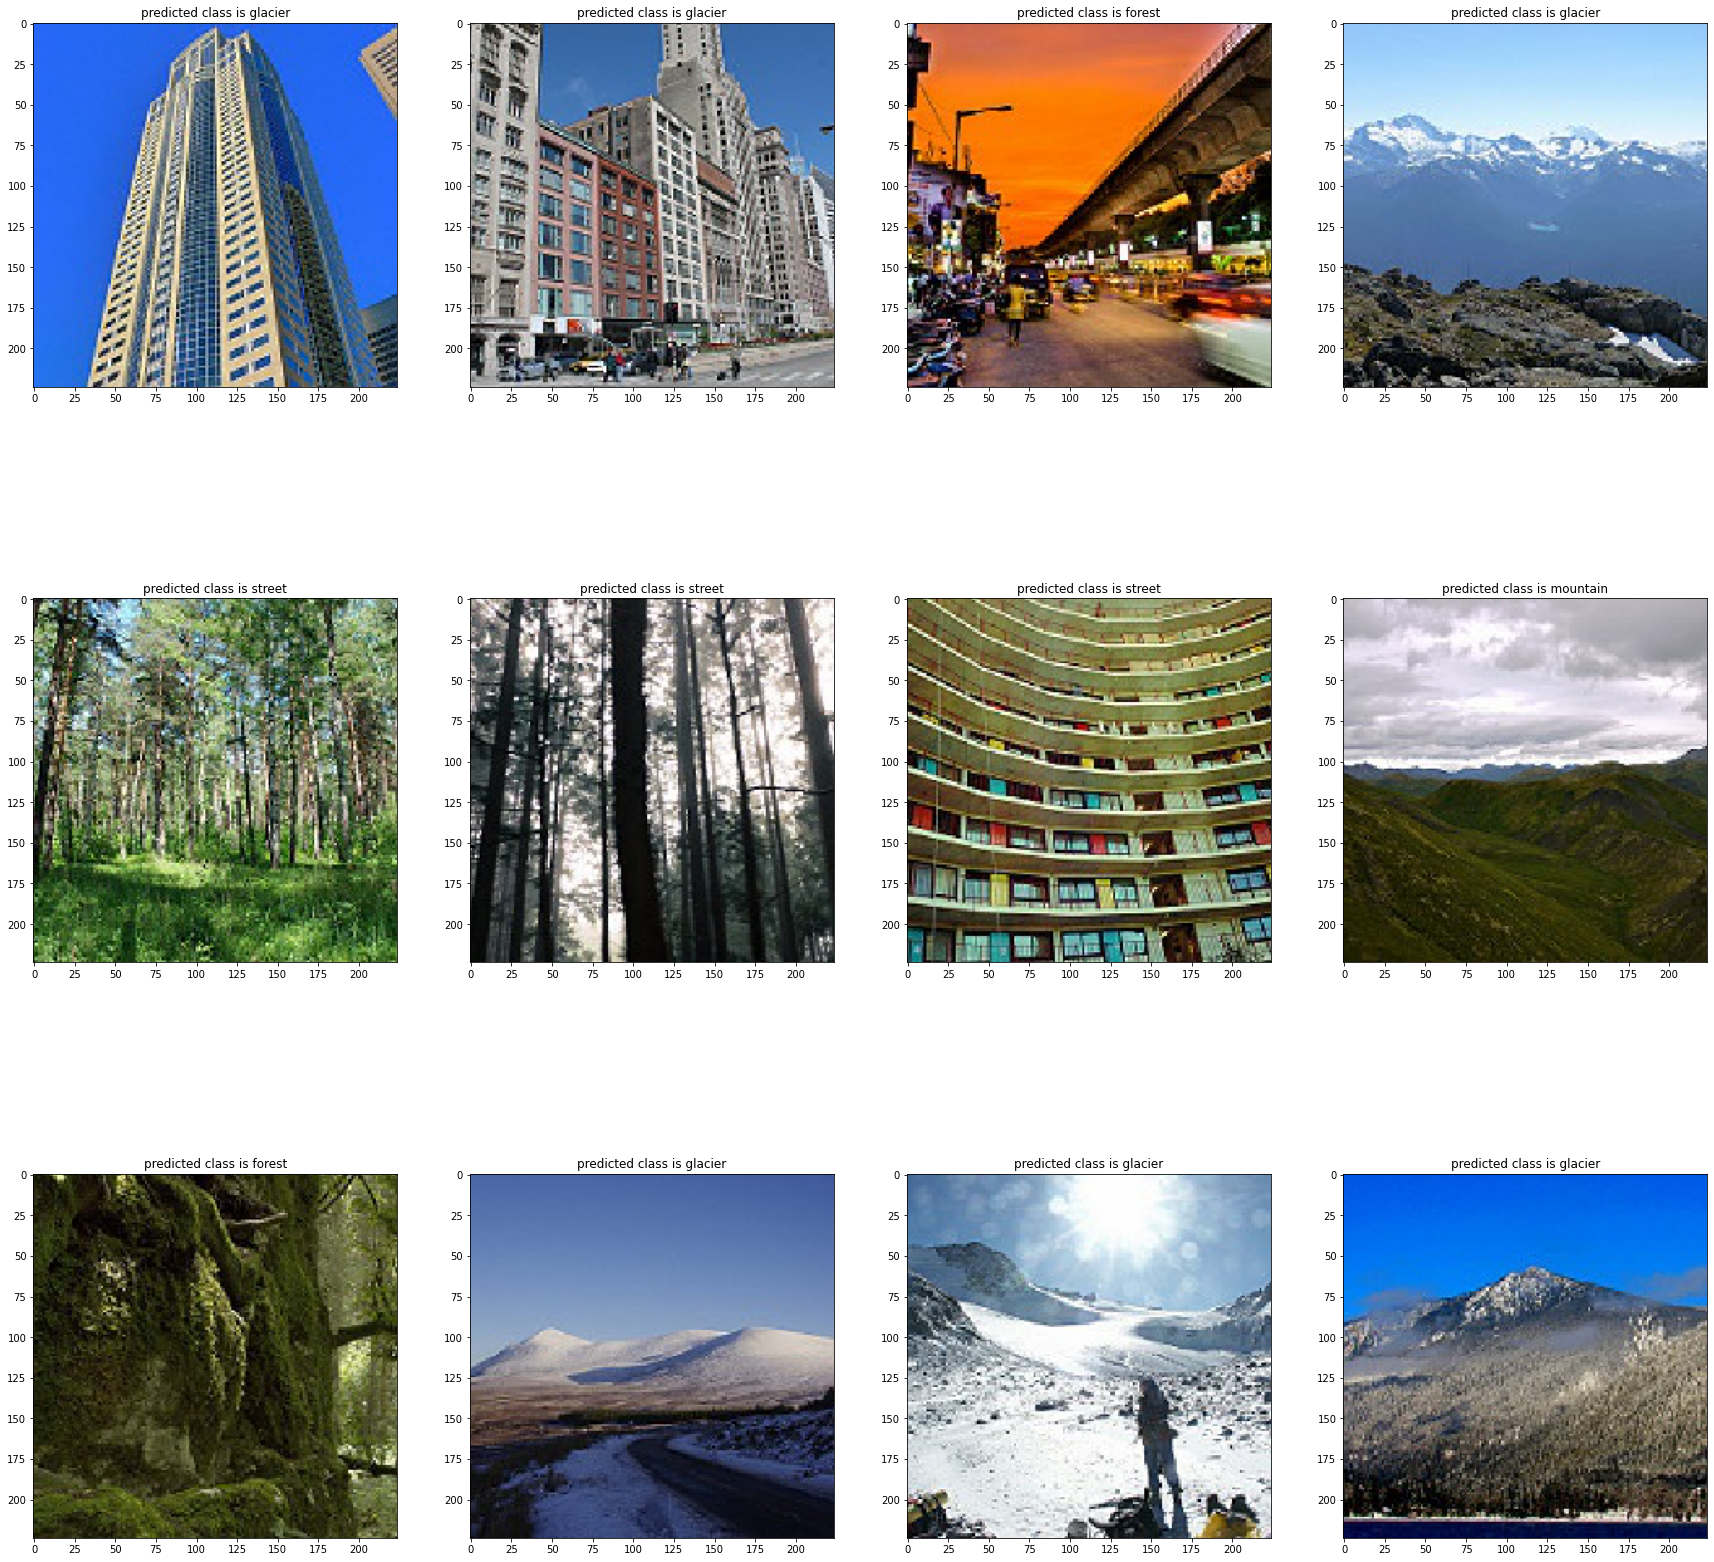

In [61]:
fig = plt.figure(figsize=(30, 30))
 
j =1
for i in file_indx:
    plt.subplot(3, 4, j)
    img = image.load_img(os.path.join(pred_dir,img_files[i]), target_size=(224,224))
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    result=mod_squeez_model_v2.predict(img)
    plt.title("predicted class is "+class_map[np.argmax(result)])
    j=j+1